In [7]:
#importing Pandas Library for data analysis 
import pandas as pd
#importing Seaborn For visualization
import seaborn as sns
#importing numpy for working with numerical type of data and array
import numpy as np
#this library is used for changing directory
import os
#this library is used for i.e matplotlib for 2D visualization
import matplotlib.pyplot as plt
#this library is used for spliting the data for testing and traing
from sklearn.model_selection import train_test_split
#this library for implmenting decision tree classifier
from sklearn import tree
#this library sklearn. metrics module implements
#several loss, score, and utility functions to 
#measure classification performance.
from sklearn import metrics
#the model which is build thid model to save we use this library
import pickle
#this is magic function
%matplotlib inline
#we changing directory
os.chdir(r'C:\Users\Shyam Adsul\Python codes SSPU\Data sets')


In [8]:
#reading csv file to load dataset for working
df = pd.read_csv('loan_borowwer_data.csv')

In [9]:
#loaded dataframe
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [10]:
#this methods are used for checking the null values in dataset
#is there is any null value this methods return True False ans
df.isnull().sum().any()
#False ---->>>>   Mean we don't have any null value

False

# Data Insights using Visualizations

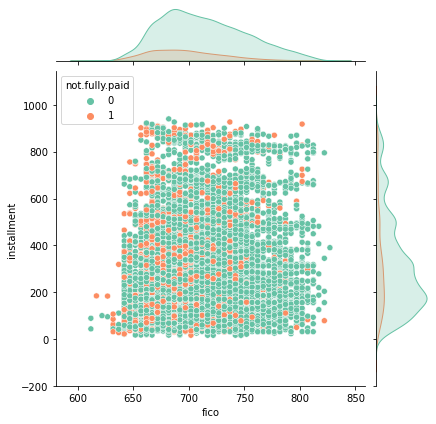

In [11]:
sns.jointplot(x='fico',y='installment',hue='not.fully.paid',palette= 'Set2',data=df)
#observations 
#Here we see the data separately for the people those who fully paid or those who not fully paid loan amount 

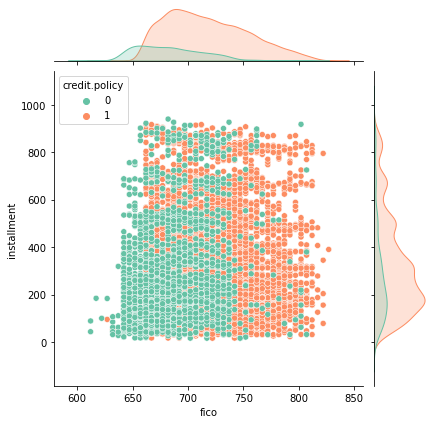

In [12]:
sns.jointplot(x='fico',y='installment',hue='credit.policy',palette= 'Set2',data=df)

<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

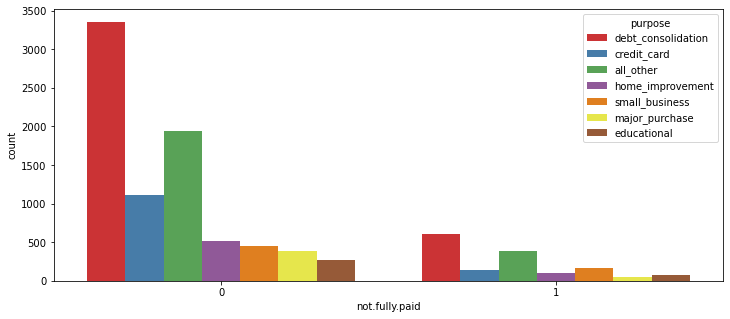

In [13]:
#here we are plotting counplot for getting observations about what's the mostly reason to take loan from company(kart)
#mostly loan is taken by debt_consolidation
#less loan taken for educational purpose

plt.figure(figsize=(12,8))
sns.countplot(x = 'not.fully.paid',hue='purpose',palette= 'Set1',data=df)
#not fully paid ---------->>>>>    1 means borrower is not going to pay the loan completely
#             ----------->>>>>>    0 means borrower is going to pay the loan total

<AxesSubplot:xlabel='credit.policy', ylabel='count'>

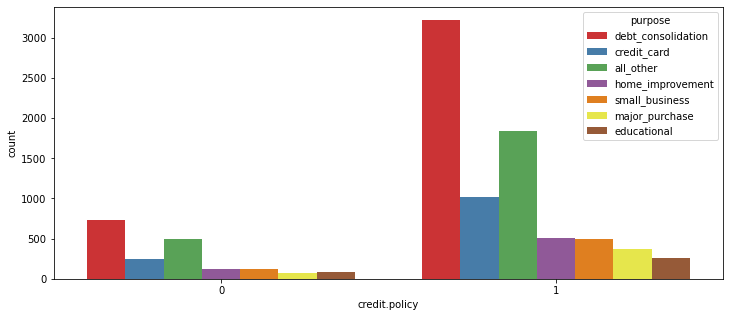

In [47]:
plt.figure(figsize=(12,5))
sns.countplot(x = 'credit.policy',hue='purpose',palette= 'Set1',data=df)
#1 if the customer meets the credit underwriting criteria of
#PeerLoanKart, and 0 otherwise

#By visualizing this counplot we encounter following observations 
#maximum peoples are those who meet


<AxesSubplot:xlabel='inq.last.6mths', ylabel='count'>

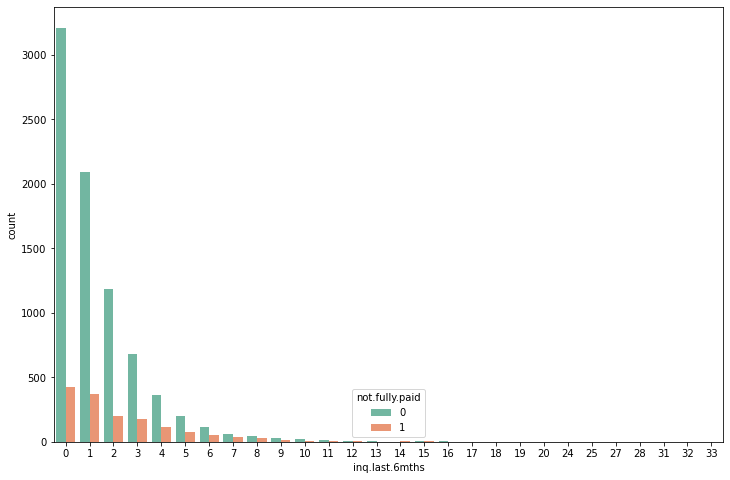

In [15]:
#plt.figure  is used set figure size 
plt.figure(figsize=(12,8))
#plotting countlot
sns.countplot(x = 'inq.last.6mths',hue='not.fully.paid',palette= 'Set2',data=df)
#not fully paid ---------->>>>>    1 means borrower is not going to pay the loan completely
#             ----------->>>>>>    0 means borrower is going to pay the loan total

In [16]:
#This method here used to get dumies for purpose column which have categories
#and then add to dataset this dumies
df1 = pd.get_dummies(df,columns=['purpose'])
df1.head(200)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,0.1059,130.18,11.034890,17.81,682,6330.041667,18168,68.5,2,0,0,0,0,1,0,0,0,0,0
196,1,0.1122,98.53,10.401350,22.79,682,9389.000000,24218,85.3,2,0,0,0,1,0,0,0,0,0,0
197,1,0.0807,15.69,9.798127,4.27,722,1470.000000,0,0.0,0,0,0,0,1,0,0,0,0,0,0
198,1,0.1091,523.14,12.206073,10.70,697,7320.000000,72303,73.7,1,0,0,0,0,1,0,0,0,0,0


# Describing the Data


In [17]:
#describe()  this method is used to get count,mean,standard deviation,20%,50%,75%  values for dataset values
df1.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054,0.243370,0.131760,0.413134,0.035811,0.065671,0.045625,0.064627
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676,0.429139,0.338248,0.492422,0.185829,0.247720,0.208682,0.245880
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
#by using copy() we are copying the df1 to  predictdata
predictdata = df1.copy()

In [19]:
#dropping the column inq.last.6mths  from dataframe predictdata
#droping not.fully.paid  from dataframe predictdata
predictdata.drop(['inq.last.6mths'],axis= 1,inplace=True)
predictdata.drop(['not.fully.paid'],axis = 1, inplace = True)

In [20]:
finaldata  = predictdata

In [21]:
#here Y is target column 
#where we predict the fully paid or not the loan
#here in  y  we provided not fully paid because this are NPA for PeerLoanKart
X = finaldata
y = df1['not.fully.paid']

In [22]:
x_train,x_test,y_train, y_test = train_test_split(X,y, test_size=0.25)

# Decision Tree 

In [23]:
model = tree.DecisionTreeClassifier()

In [24]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [25]:
pred_model = model.predict(x_test)

In [26]:
pred_model

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [27]:
print (metrics.confusion_matrix(y_test,pred_model))

[[1657  347]
 [ 302   89]]


In [28]:
print (metrics.accuracy_score(y_test,pred_model)*100,"%")


72.901878914405 %


In [29]:
# For better visualisation:
result = pd.crosstab(y_test, pred_model, rownames=['Actual'], colnames=['Predicted'],margins=True)
result

Predicted,0,1,All
Actual,,,
0,1657,347,2004
1,302,89,391
All,1959,436,2395


# Conclusion by Decision Tree

# Random Forest 

In [30]:
from sklearn.ensemble import RandomForestClassifier


In [31]:
# create regressor object 
model_forest = RandomForestClassifier() 
  
# fit the regressor with x and y data 
model_forest.fit(x_train, y_train)   

RandomForestClassifier()

In [32]:
Y_pred = model_forest.predict(x_test)  # test the output by changing values 


In [33]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
print (metrics.accuracy_score(y_test,Y_pred)*100,"%")


83.38204592901879 %


In [35]:
# For better visualisation:
result = pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
result

Predicted,0,1,All
Actual,,,
0,1995,9,2004
1,389,2,391
All,2384,11,2395


# Bagging 

In [36]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(SVC(gamma='scale', probability=True),
                                bootstrap=True, # set to False to use Pasting instead of Bagging
                                n_estimators=80, # number of SVC models to create
                                max_samples=80, # each model is trained from randomly sampled 100 instances 
                                
                               )
bagging_clf.fit(x_train, y_train) # training
y_pred_bagging = bagging_clf.predict(x_test) # predicting
print (metrics.accuracy_score(y_test, Y_pred)*100,"%")



83.38204592901879 %


In [37]:
print (metrics.confusion_matrix(y_test,y_pred_bagging))

[[2004    0]
 [ 391    0]]


In [38]:
Output_ = pd.crosstab(y_test, y_pred_bagging, rownames=['Actual'], colnames=['Predicted'],margins=True)
Output_

Predicted,0,All
Actual,,
0,2004,2004
1,391,391
All,2395,2395


# Gradient Boosting

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [40]:
parameters = {
   "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3],
    "max_features":["log2"],
    "criterion": ["friedman_mse"],
    "subsample":[0.5],
    "n_estimators":[10]
    }
GBCLF = GridSearchCV(GradientBoostingClassifier(), parameters, cv=5, n_jobs=-1,verbose=1)

In [41]:
GBCLF.fit(x_train,y_train)
print(GBCLF.score(x_train,y_train))
#following errors are due to kernel interruption because this takes too much time  *******************************

Fitting 5 folds for each of 1008 candidates, totalling 5040 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 536 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 1536 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 2936 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 4736 tasks      | elapsed:   56.1s
[Parallel(n_jobs=-1)]: Done 5040 out of 5040 | elapsed:   59.5s finished


0.8410135041069191


In [42]:
GBCLF.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.01,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': 'log2',
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.1,
 'n_estimators': 10,
 'subsample': 0.5}

In [43]:
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01],
    "min_samples_split": [0.1],
    "min_samples_leaf": [0.1],
    "max_depth":[3],
    "max_features":["log2"],
    "criterion": ["friedman_mse"],
    "subsample":[0.5],
    "n_estimators":[10]
    }
GBCLF = GridSearchCV(GradientBoostingClassifier(), parameters, cv=10, n_jobs=-1,verbose=1)
GBCLF.fit(x_train, y_train)
print(GBCLF.score(x_train, y_train)*100,"%")

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


84.10135041069191 %


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished


In [44]:
O_P_pred =GBCLF.predict(x_test)


In [45]:
print (metrics.confusion_matrix(y_test,O_P_pred))

[[2004    0]
 [ 391    0]]


In [46]:
Output = pd.crosstab(y_test, O_P_pred, rownames=['Actual'], colnames=['Predicted'],margins=True)
Output

Predicted,0,All
Actual,,
0,2004,2004
1,391,391
All,2395,2395


# Conclusion